In [1]:
pwd

'/mnt/c/Users/u0124144/Documents/Tsyganenko/notebook'

In [1]:
import os
import seaborn as sns
from math import ceil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir('..')

In [2]:
from DA.domain import accumulate_values, compute_domain, get_results, compute_coords

In [3]:
source = 'model/TA15/output'
coords = [.8, .8]
extra = [[.7,.5]] #, [.4,.9], [.5,.5]]
varying = ['B0z']
identifier = ''

autosave = False
# parse input
x_coords = [coords[0]]
z_coords = [coords[1]]
if len(extra) > 0:
    for pair in extra:
        x_coords.append(pair[0])
        z_coords.append(pair[1])

x_coords = np.array(x_coords)
z_coords = np.array(z_coords)

grid, x, y = compute_coords(source, x_coords, z_coords)

loc = np.zeros((x.shape[0], 2))

for i in range(len(x)):
    loc[i, 0] = round(100*grid[0][x[i], y[i]])/100
    loc[i, 1] = round(100*grid[2][x[i], y[i]])/100

Parsed model/TA15/output/OUT00.DAT


/mnt/c/Users/u0124144/Documents/Tsyganenko/DA/preprocess.py:13: RuntimeWarning: divide by zero encountered in true_divide
  rhx = x/r
/mnt/c/Users/u0124144/Documents/Tsyganenko/DA/preprocess.py:13: RuntimeWarning: invalid value encountered in true_divide
  rhx = x/r
/mnt/c/Users/u0124144/Documents/Tsyganenko/DA/preprocess.py:14: RuntimeWarning: divide by zero encountered in true_divide
  rhy = y/r
/mnt/c/Users/u0124144/Documents/Tsyganenko/DA/preprocess.py:14: RuntimeWarning: invalid value encountered in true_divide
  rhy = y/r
/mnt/c/Users/u0124144/Documents/Tsyganenko/DA/preprocess.py:15: RuntimeWarning: divide by zero encountered in true_divide
  rhz = z/r
/mnt/c/Users/u0124144/Documents/Tsyganenko/DA/preprocess.py:15: RuntimeWarning: invalid value encountered in true_divide
  rhz = z/r
/mnt/c/Users/u0124144/Documents/Tsyganenko/DA/preprocess.py:17: RuntimeWarning: divide by zero encountered in true_divide
  BDx = (1/r3) * (3 * (Mx*rhx+My*rhy+Mz*rhz) * rhx - Mx)
/mnt/c/Users/u012414

In [4]:
cor_ext, cor_magn, field = get_results(source, x, y)

model/TA15/output
Parsed model/TA15/output/OUT00.DAT
Parsed model/TA15/output/OUT01.DAT
Parsed model/TA15/output/OUT02.DAT
Parsed model/TA15/output/OUT03.DAT
Parsed model/TA15/output/OUT04.DAT
Parsed model/TA15/output/OUT05.DAT
Parsed model/TA15/output/OUT06.DAT
Parsed model/TA15/output/OUT07.DAT
Parsed model/TA15/output/OUT08.DAT
Parsed model/TA15/output/OUT09.DAT
Parsed model/TA15/output/OUT10.DAT
Parsed model/TA15/output/OUT11.DAT
Parsed model/TA15/output/OUT12.DAT
Parsed model/TA15/output/OUT13.DAT
Parsed model/TA15/output/OUT14.DAT
Parsed model/TA15/output/OUT15.DAT
Parsed model/TA15/output/OUT16.DAT
Parsed model/TA15/output/OUT17.DAT
Parsed model/TA15/output/OUT18.DAT
Parsed model/TA15/output/OUT19.DAT
Parsed model/TA15/output/OUT20.DAT
Parsed model/TA15/output/OUT21.DAT
Parsed model/TA15/output/OUT22.DAT
Parsed model/TA15/output/OUT23.DAT
Parsed model/TA15/output/OUT24.DAT
Parsed model/TA15/output/OUT25.DAT
Parsed model/TA15/output/OUT26.DAT
Parsed model/TA15/output/OUT27.DAT
Pa

/mnt/c/Users/u0124144/Documents/Tsyganenko/DA/domain.py:35: RuntimeWarning: divide by zero encountered in true_divide
  div = np.where(dv_ > 0, 1/dv_, 0)
/mnt/c/Users/u0124144/Documents/Tsyganenko/DA/domain.py:35: RuntimeWarning: invalid value encountered in greater
  div = np.where(dv_ > 0, 1/dv_, 0)


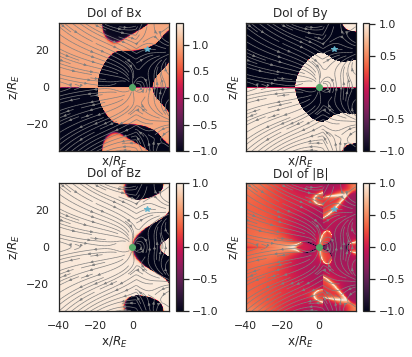

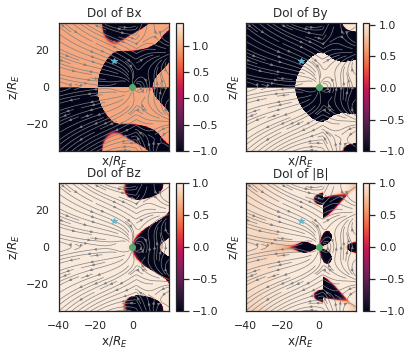

In [26]:
for ind, (x, y) in enumerate(loc):
    if autosave:
        f = filename + 'coordinate_' + str(ind)
    create_image(cor_ext, cor_magn, grid, field, x, y, ind, None)

In [9]:
sns.set()
sns.set_style('white')

In [25]:
def create_image(cor_ext, cor_magn, grid, field, x, y, ind, filename):
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, squeeze=True, figsize=(6,5))
    k = list(cor_ext.keys())
    for i, axi in enumerate(axes.flatten()):
        if i < 3:
            surf = axi.imshow(cor_ext[k[i]][:, :, ind], vmin=-1, extent=(grid[0][0,0], grid[0][0,-1], grid[2][0,0], grid[2][-1, 0]))
            axi.set_title('DoI of {}'.format(k[i]))
        else:
            surf = axi.imshow(cor_magn[:, :, ind], vmin=-1, extent=(grid[0][0,0], grid[0][0,-1], grid[2][0,0], grid[2][-1, 0]))
            axi.set_title('DoI of |B|')
        axi.set_xlim(np.min(grid[0]), np.max(grid[0]))
        axi.set_ylim(np.min(grid[2]),np.max(grid[2]))
        axi.set_xlabel(r'x/$R_E$')
        axi.set_ylabel(r'z/$R_E$')
        axi.plot(x, y, 'c*')
        axi.plot(0, 0, 'go')
        fig.colorbar(surf, ax=axi)
        
        if field is not None:
            axi.streamplot(grid[0], grid[2], field[0], field[2], density=1.2, linewidth=.7, color='gray', arrowsize=.5)
    plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.26, hspace=0.25)
    